In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

import matplotlib.pyplot as plt
import seaborn as sns   

%matplotlib inline

# Description of the data

following technique from https://www.slideshare.net/charlet_jeremie/do-we-know-our-data-as-good-as-we-know-our-tools

project: https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/page/25/

# Exploratory data analysis

In [2]:
df_values = pd.read_csv("data/Training set values.csv.gz",index_col="id")
df_labels = pd.read_csv("data/Training set labels.csv.gz",index_col="id")


In [3]:
# Looks at the first few lines to get an idea what the actual data looks like
print(df_values.shape)
display(df_values.head(3))
display(df_labels.head(3))

(59400, 39)


,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe


,status_group
id,
69572,functional
8776,functional
34310,functional


In [4]:
df=df_values
df["status_group"]=df_labels["status_group"]

In [5]:
df.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [6]:
df.describe()

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [7]:
print(df.columns)
print(len(df.columns))

Index(['amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer',
       'longitude', 'latitude', 'wpt_name', 'num_private', 'basin',
       'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward',
       'population', 'public_meeting', 'recorded_by', 'scheme_management',
       'scheme_name', 'permit', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group',
       'status_group'],
      dtype='object')
40


## Check columns which look the same
are they duplicated, can we remove some of them?

In [15]:
for column in ['extraction_type',
       'extraction_type_group', 'extraction_type_class']:
    print(df[column].unique())

['gravity' 'submersible' 'swn 80' 'nira/tanira' 'india mark ii' 'other'
 'ksb' 'mono' 'windmill' 'afridev' 'other - rope pump' 'india mark iii'
 'other - swn 81' 'other - play pump' 'cemo' 'climax' 'walimi'
 'other - mkulima/shinyanga']
['gravity' 'submersible' 'swn 80' 'nira/tanira' 'india mark ii' 'other'
 'mono' 'wind-powered' 'afridev' 'rope pump' 'india mark iii'
 'other handpump' 'other motorpump']
['gravity' 'submersible' 'handpump' 'other' 'motorpump' 'wind-powered'
 'rope pump']


seems to be a hierarchy between those columns

In [13]:
for payment, df2 in df[['payment', 'payment_type']].groupby(by="payment"):
    print(payment);
    print(df2.payment_type.unique())

never pay
['never pay']
other
['other']
pay annually
['annually']
pay monthly
['monthly']
pay per bucket
['per bucket']
pay when scheme fails
['on failure']
unknown
['unknown']


those 2 columns show exactly the same stuff. we can remove one of them.

In [14]:
for quantity_group, df2 in df[['quantity', 'quantity_group']].groupby(by="quantity_group"):
    print(quantity_group);
    print(df2.quantity.unique())

dry
['dry']
enough
['enough']
insufficient
['insufficient']
seasonal
['seasonal']
unknown
['unknown']


those 2 columns show exactly the same stuff. we can remove one of them.

In [16]:
for management_group, df2 in df[['management', 'management_group']].groupby(by="management_group"):
    print(management_group);
    print(df2.management.unique())

commercial
['private operator' 'company' 'water authority' 'trust']
other
['other' 'other - school']
parastatal
['parastatal']
unknown
['unknown']
user-group
['vwc' 'wug' 'water board' 'wua']


seems to be a hierarchy between those columns

In [18]:
for waterpoint_type_group, df2 in df[['waterpoint_type', 'waterpoint_type_group']].groupby(by="waterpoint_type_group"):
    print(waterpoint_type_group);
    print(df2.waterpoint_type.unique())

cattle trough
['cattle trough']
communal standpipe
['communal standpipe' 'communal standpipe multiple']
dam
['dam']
hand pump
['hand pump']
improved spring
['improved spring']
other
['other']


In [22]:
display(df[df.waterpoint_type_group=="communal standpipe"].waterpoint_type_group.count())
display(df[df.waterpoint_type=="communal standpipe"].waterpoint_type_group.count())
display(df[df.waterpoint_type=="communal standpipe multiple"].waterpoint_type_group.count())

34625

28522

6103

duplicated on most columns but for communal standpipe, which is divided into 2 categories, and still contain a large number of data. 
We probably want to keep the detailed column and drop the group one.

### Water quality

In [42]:
for quality_group, df2 in df[['water_quality', 'quality_group']].groupby(by="quality_group"):
    print(quality_group);
    print(df2.water_quality.unique())

colored
['coloured']
fluoride
['fluoride' 'fluoride abandoned']
good
['soft']
milky
['milky']
salty
['salty' 'salty abandoned']
unknown
['unknown']


In [43]:
display(df[df.water_quality=="fluoride"].water_quality.count())
display(df[df.water_quality=="fluoride abandoned"].water_quality.count())
display(df[df.water_quality=="salty"].water_quality.count())
display(df[df.water_quality=="salty abandoned"].water_quality.count())

200

17

4856

339

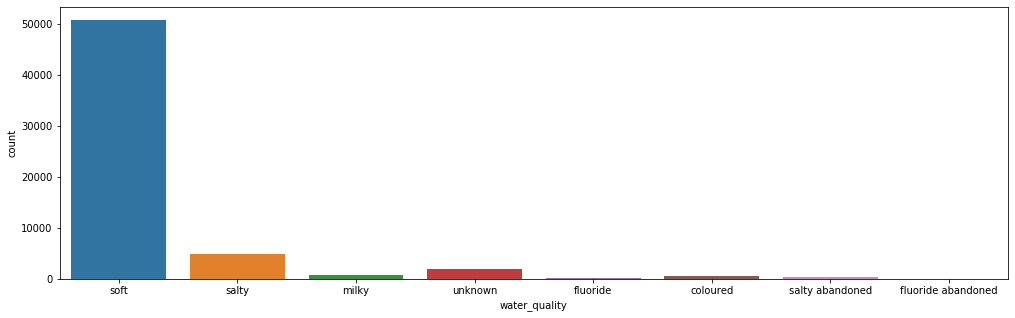

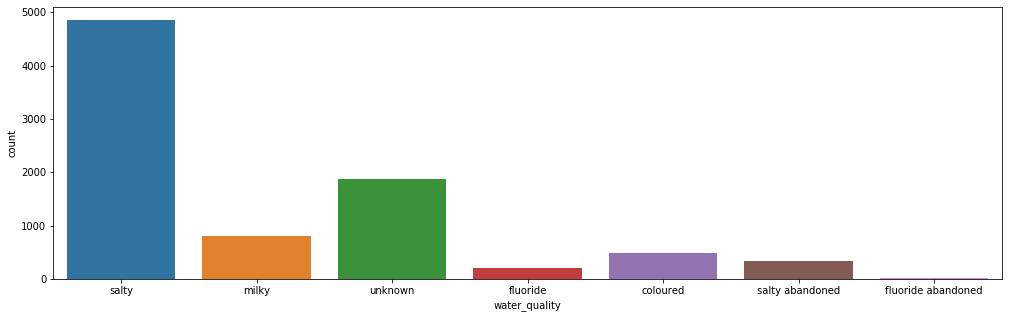

In [47]:
sns.countplot(x=df.water_quality)
plt.show()
sns.countplot(x=df[df.water_quality!="soft"].water_quality)

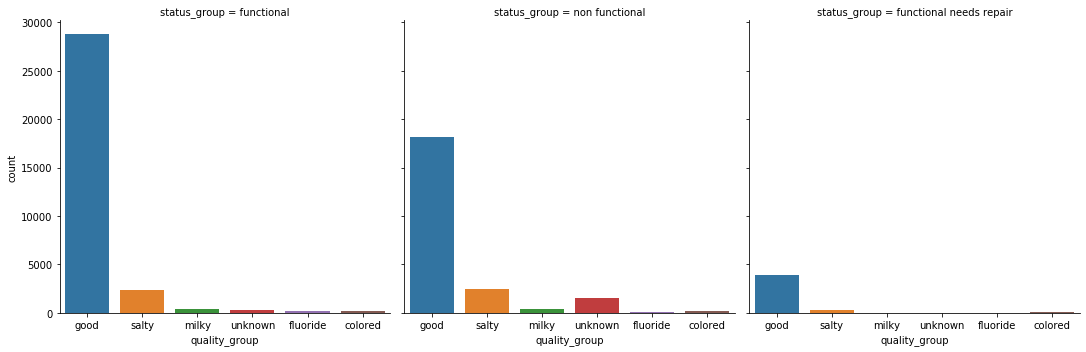

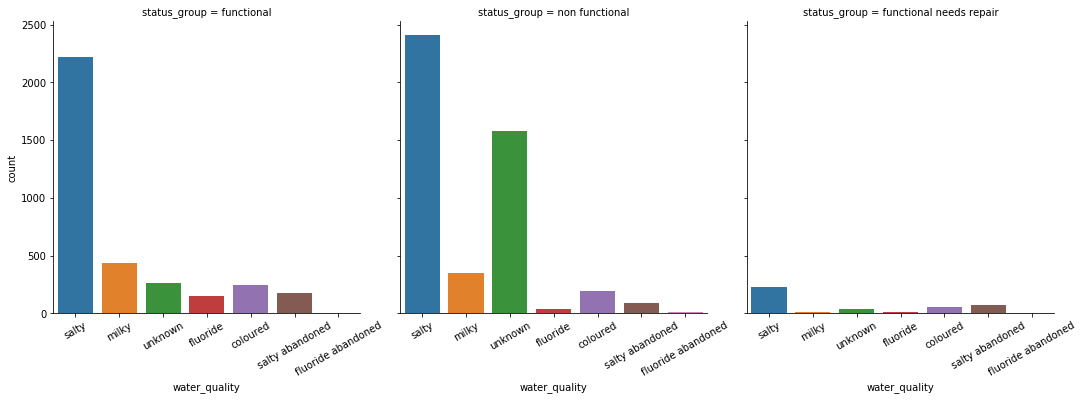

In [67]:
plt.rcParams["figure.figsize"] = (17,5)

sns.catplot("quality_group",
            col="status_group",
            data=df,
            kind="count",
           );
plt.show()

plot = sns.catplot("water_quality",
            col="status_group",
            data=df[df.quality_group!="good"],
            kind="count",
           );
plot.set_xticklabels(rotation=30)


salty and salty_abandoned do not show the same distribution against status_group, so we should keep it, and we can drop quality_group

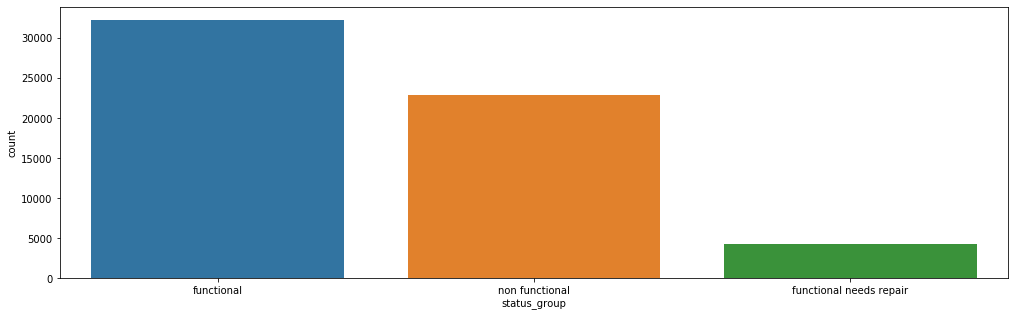

In [54]:
sns.countplot(x=df.status_group)

## Check num_private which looks random

In [26]:
print(df.num_private.describe())
df.num_private.unique()

count    59400.000000
mean         0.474141
std         12.236230
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       1776.000000
Name: num_private, dtype: float64


array([   0,   39,    5,   45,    6,    3,  698,   32,   15,    7,   25,
        102,    1,   93,   14,   34,  120,   17,  213,   47,    8,   41,
         80,  141,   20,   35,  131,    4,   22,   11,   87,   61,   65,
        136,    2,  180,   38,   62,    9,   16,   23,   42,   24,   12,
        668,  672,   58,  150,  280,  160,   50, 1776,   30,   27,   10,
         94,   26,  450,  240,  755,   60,  111,  300,   55, 1402])

58643


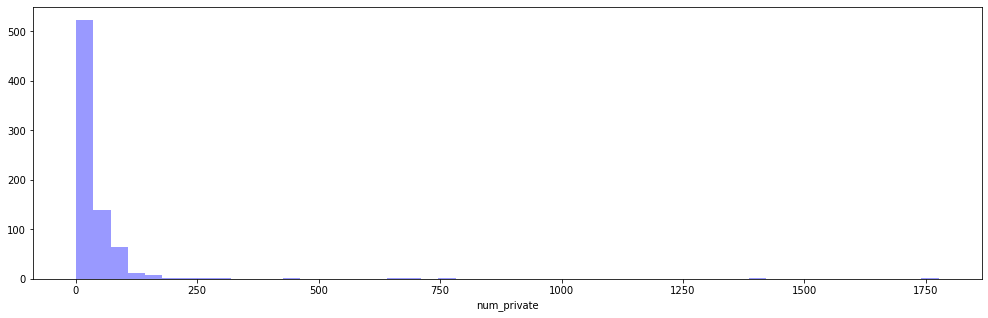

In [41]:
print(df[df.num_private == 0].num_private.count())
sns.distplot(df[df.num_private>0].num_private,kde=False,color="b")

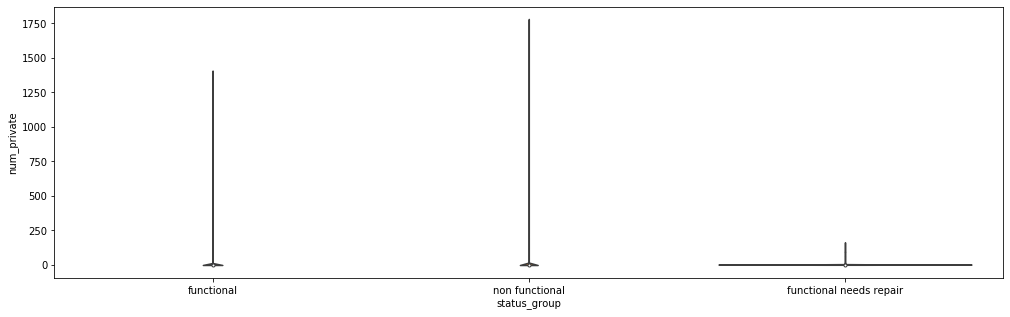

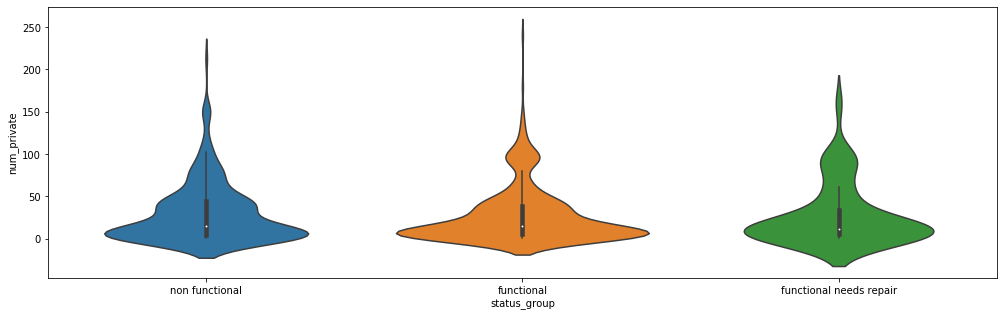

In [32]:

plt.rcParams["figure.figsize"] = (17,5)
sns.violinplot(x='status_group',y='num_private',data=df)
plt.show()
sns.violinplot(x='status_group',y='num_private',data=df[(df.num_private>0)&(df.num_private<250)])

not only most data have missing private num, but when we check it against target column, we cannot observe any correlation.

## Key findings on exploratory analysis

can remove those columns: payment_type and quantity_group, waterpoint_type_group, num_private, quality_group

those columns have a hierarchy between them: 'extraction_type', 'extraction_type_group', 'extraction_type_class'

those columns have a hierarchy between them: 'management', 'management_group'